In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [42]:
#dsk_big_frame_grouped_by_mac.csv
mac_kwhh_tot = pd.read_csv('dsk_big_frame_grouped_by_mac.csv',names=['mac','kwhh'],skiprows=1,header=None)

In [43]:
macinfo = pd.read_csv("informations_household_update.csv",
                     skip_blank_lines=True
                    )

In [44]:
mac_kwhh_tot = mac_kwhh_tot.join(macinfo.set_index('LCLid'), on='mac')


In [54]:
mac_kwhh_tot["label"] = (mac_kwhh_tot["mac"].map(str) + ' ' + mac_kwhh_tot["Acorn_grouped"]).str.wrap(10)

In [55]:
mac_kwhh_tot


,mac,kwhh,stdorToU,Acorn,Acorn_grouped,file,label
0,MAC000002,6095.672001,Std,ACORN-A,Affluent,block_0,MAC000002\nAffluent
1,MAC000003,14080.862003,Std,ACORN-P,Adversity,block_0,MAC000003\nAdversity
2,MAC000004,1119.839000,Std,ACORN-E,Affluent,block_0,MAC000004\nAffluent
3,MAC000005,2911.006000,ToU,ACORN-C,Affluent,block_11,MAC000005\nAffluent
4,MAC000006,2167.448000,Std,ACORN-Q,Adversity,block_0,MAC000006\nAdversity
5,MAC000007,4952.695999,Std,ACORN-H,Comfortable,block_0,MAC000007 \nComfortabl\ne
6,MAC000008,9440.650000,Std,ACORN-H,Comfortable,block_0,MAC000008 \nComfortabl\ne
7,MAC000009,4513.734001,Std,ACORN-L,Adversity,block_0,MAC000009\nAdversity
8,MAC000010,13780.230997,Std,ACORN-H,Comfortable,block_0,MAC000010 \nComfortabl\ne
9,MAC000011,7446.026001,Std,ACORN-N,Adversity,block_0,MAC000011\nAdversity


In [14]:
acorn_kwhh=mac_kwhh_tot.groupby('Acorn_grouped',as_index=False)['kwhh'].sum()


In [15]:
acorn_kwhh

,Acorn_grouped,kwhh
0,ACORN-,9.374947e+03
1,ACORN-U,3.433143e+05
2,Adversity,9.654154e+06
3,Affluent,1.615819e+07
4,Comfortable,9.374789e+06


In [20]:
#remove categories I believe are in error
acorn_kwhh = acorn_kwhh[acorn_kwhh.Acorn_grouped != 'ACORN-']
acorn_kwhh = acorn_kwhh[acorn_kwhh.Acorn_grouped != 'ACORN-U']

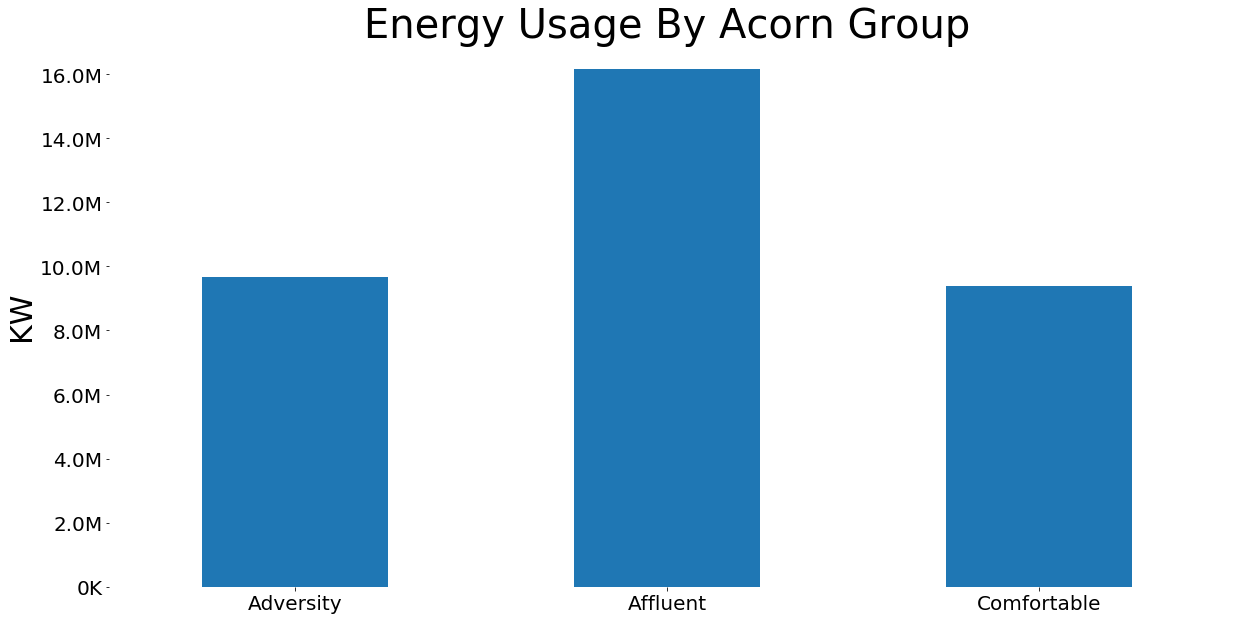

In [56]:
def makeabbrev(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '{:1.1f}M'.format(x*1e-6)
    return '{:1.0f}K'.format(x*1e-3)

formatter = FuncFormatter(makeabbrev)

ax = acorn_kwhh.plot(x='Acorn_grouped',kind='bar',figsize=(20,10),legend=False, rot=0)
ax.yaxis.set_major_formatter(formatter)  # set formatter to needed axis
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('', size =30)
plt.ylabel('KW', size = 30)
plt.title('Energy Usage By Acorn Group', size = 40)
plt.xticks(size = 20)
plt.yticks(size = 20) 
plt.show()

In [19]:
acorn_kwhh

Acorn_grouped
ACORN-         9.374947e+03
ACORN-U        3.433143e+05
Adversity      9.654154e+06
Affluent       1.615819e+07
Comfortable    9.374789e+06
Name: kwhh, dtype: float64

In [59]:
acorn_kwhh_mean=mac_kwhh_tot.groupby('Acorn_grouped',as_index=False)['kwhh'].mean()

In [60]:
acorn_kwhh_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
Acorn_grouped    5 non-null object
kwhh             5 non-null float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [61]:
acorn_kwhh_mean.rename(columns={'kwhh':'acorn_mean'},inplace='True')

In [62]:
acorn_kwhh_mean


,Acorn_grouped,acorn_mean
0,ACORN-,4687.473498
1,ACORN-U,7006.414857
2,Adversity,5324.960626
3,Affluent,7371.437474
4,Comfortable,6229.095996


In [63]:
mac_acron_mean = mac_kwhh_tot.join(macinfo.s

SyntaxError: unexpected EOF while parsing (<ipython-input-63-196e464daaca>, line 1)

In [64]:
#mac_acron_mean = mac_kwhh_tot.join(acorn_kwhh_mean,on='Acorn_grouped')

result = pd.merge(mac_kwhh_tot,
                 acorn_kwhh_mean,
                 on='Acorn_grouped', 
                 how='right')

In [65]:
result[4500:].head(n=100)

,mac,kwhh,stdorToU,Acorn,Acorn_grouped,file,label,acorn_mean
4500,MAC001915,2487.866000,Std,ACORN-J,Comfortable,block_3,MAC001915 \nComfortabl\ne,6229.095996
4501,MAC001924,1906.645000,Std,ACORN-F,Comfortable,block_3,MAC001924 \nComfortabl\ne,6229.095996
4502,MAC001926,8703.005002,Std,ACORN-F,Comfortable,block_3,MAC001926 \nComfortabl\ne,6229.095996
4503,MAC001934,4878.524000,Std,ACORN-F,Comfortable,block_3,MAC001934 \nComfortabl\ne,6229.095996
4504,MAC001935,5950.221000,Std,ACORN-G,Comfortable,block_3,MAC001935 \nComfortabl\ne,6229.095996
4505,MAC001940,5826.491000,Std,ACORN-G,Comfortable,block_3,MAC001940 \nComfortabl\ne,6229.095996
4506,MAC001941,6592.625997,Std,ACORN-F,Comfortable,block_3,MAC001941 \nComfortabl\ne,6229.095996
4507,MAC001944,2689.829000,Std,ACORN-F,Comfortable,block_3,MAC001944 \nComfortabl\ne,6229.095996
4508,MAC001946,2365.535000,Std,ACORN-F,Comfortable,block_3,MAC001946 \nComfortabl\ne,6229.095996
4509,MAC001948,7825.770000,Std,ACORN-F,Comfortable,block_3,MAC001948 \nComfortabl\ne,6229.095996


In [66]:
plt.figure();


In [67]:
resultsmall=result.sort_values('kwhh',ascending=False)[:50]
#resultsmall=result.sort_values('kwhh',ascending=False)[-50:]

In [68]:
resultsmall

,mac,kwhh,stdorToU,Acorn,Acorn_grouped,file,label,acorn_mean
1517,MAC004179,65623.649002,Std,ACORN-A,Affluent,block_8,MAC004179\nAffluent,7371.437474
2129,MAC005406,51950.872009,Std,ACORN-A,Affluent,block_11,MAC005406\nAffluent,7371.437474
242,MAC000557,44660.903009,Std,ACORN-A,Affluent,block_1,MAC000557\nAffluent,7371.437474
406,MAC000985,43031.147995,ToU,ACORN-D,Affluent,block_11,MAC000985\nAffluent,7371.437474
462,MAC001145,42592.305990,Std,ACORN-A,Affluent,block_2,MAC001145\nAffluent,7371.437474
1898,MAC004993,40768.809007,Std,ACORN-E,Affluent,block_10,MAC004993\nAffluent,7371.437474
43,MAC000105,40426.193996,Std,ACORN-D,Affluent,block_0,MAC000105\nAffluent,7371.437474
4447,MAC001739,37827.680006,Std,ACORN-G,Comfortable,block_3,MAC001739 \nComfortabl\ne,6229.095996
1700,MAC004593,37340.361997,ToU,ACORN-A,Affluent,block_13,MAC004593\nAffluent,7371.437474
4870,MAC003329,36346.253001,Std,ACORN-J,Comfortable,block_6,MAC003329 \nComfortabl\ne,6229.095996


In [69]:
resultsmall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1517 to 1641
Data columns (total 8 columns):
mac              50 non-null object
kwhh             50 non-null float64
stdorToU         50 non-null object
Acorn            50 non-null object
Acorn_grouped    50 non-null object
file             50 non-null object
label            50 non-null object
acorn_mean       50 non-null float64
dtypes: float64(2), object(6)
memory usage: 3.5+ KB


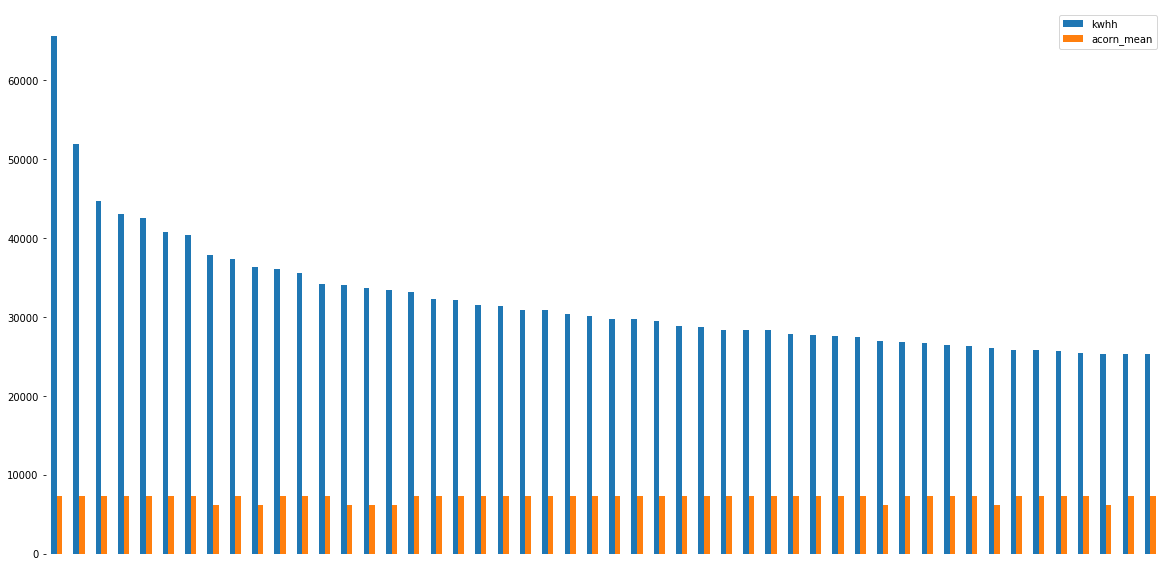

In [70]:
resultsmall[['kwhh','acorn_mean','mac']].plot(kind='bar',figsize=(20,10))
#resultsmall[['kwhh','acorn_mean','mac']].plot.bar(x='mac')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [71]:
result[:4].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 8 columns):
mac              4 non-null object
kwhh             4 non-null float64
stdorToU         4 non-null object
Acorn            4 non-null object
Acorn_grouped    4 non-null object
file             4 non-null object
label            4 non-null object
acorn_mean       4 non-null float64
dtypes: float64(2), object(6)
memory usage: 288.0+ bytes
